# Very simple word2vec example @ [nlintz's tutoral](https://github.com/nlintz/TensorFlow-Tutorials)

In [72]:
import collections
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import gc
gc.collect()
print ("Packages loaded.")

Packages loaded.


# Configuration

In [61]:
# Configuration
batch_size     = 20
embedding_size = 2     # This is just for visualization
num_sampled    = 15    # Number of negative examples to sample.

# Sentences, we will use

In [62]:
# Sample sentences
sentences = ["the quick brown fox jumped over the lazy dog",
            "I love cats and dogs",
            "we all love cats and dogs",
            "cats and dogs are great",
            "sung likes cats",
            "she loves dogs",
            "cats can be very independent",
            "cats are great companions when they want to be",
            "cats are playful",
            "cats are natural hunters",
            "It's raining cats and dogs",
            "dogs and cats love sung"]
# 'sentences' is 'list' 
print ("'sentences' is %s and length is %d." 
       % (type(sentences), len(sentences)))

'sentences' is <class 'list'> and length is 12.


# sentences to words and count

# words: list of all words (just concatenation) 

In [4]:
words = " ".join(sentences).split() ##分割句子获取单词列表
print ("'words' is %s and length is %d." % (type(words), len(words)))
print (words)

'words' is <class 'list'> and length is 62.
['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog', 'I', 'love', 'cats', 'and', 'dogs', 'we', 'all', 'love', 'cats', 'and', 'dogs', 'cats', 'and', 'dogs', 'are', 'great', 'sung', 'likes', 'cats', 'she', 'loves', 'dogs', 'cats', 'can', 'be', 'very', 'independent', 'cats', 'are', 'great', 'companions', 'when', 'they', 'want', 'to', 'be', 'cats', 'are', 'playful', 'cats', 'are', 'natural', 'hunters', "It's", 'raining', 'cats', 'and', 'dogs', 'dogs', 'and', 'cats', 'love', 'sung']


# count: list of pairs, each pair consists of 'cats', 10

In [63]:
count = collections.Counter(words).most_common() ##统计词频
print ("'count' is %s and length is %d." % (type(count), len(count)))
print (("Word count of top five is %s") % (count[:5]))
print (count)

'count' is <class 'list'> and length is 35.
Word count of top five is [('cats', 10), ('dogs', 6), ('and', 5), ('are', 4), ('love', 3)]
[('cats', 10), ('dogs', 6), ('and', 5), ('are', 4), ('love', 3), ('the', 2), ('great', 2), ('sung', 2), ('be', 2), ('quick', 1), ('brown', 1), ('fox', 1), ('jumped', 1), ('over', 1), ('lazy', 1), ('dog', 1), ('I', 1), ('we', 1), ('all', 1), ('likes', 1), ('she', 1), ('loves', 1), ('can', 1), ('very', 1), ('independent', 1), ('companions', 1), ('when', 1), ('they', 1), ('want', 1), ('to', 1), ('playful', 1), ('natural', 1), ('hunters', 1), ("It's", 1), ('raining', 1)]


# See what's in the 'words' and 'count'

In [6]:
print (words[0:5])
print (count[0:3])

['the', 'quick', 'brown', 'fox', 'jumped']
[('cats', 10), ('dogs', 6), ('and', 5)]


# Build dictionaries

In [41]:
rdic = [i[0] for i in count] #reverse dic, idx -> word相当于取出单词对单词去重
dic = {w: i for i, w in enumerate(rdic)} #dic, word -> id ###很牛逼的函数##给单词进行排序
voc_size = len(dic) # Number of vocabulary 
print ("'rdic' is %s and length is %d." % (type(rdic), len(rdic)))
print ("'dic' is %s and length is %d." % (type(dic), len(dic)))

'rdic' is <class 'list'> and length is 35.
'dic' is <class 'dict'> and length is 35.


In [42]:
print (rdic)

['cats', 'dogs', 'and', 'are', 'love', 'the', 'great', 'sung', 'be', 'quick', 'brown', 'fox', 'jumped', 'over', 'lazy', 'dog', 'I', 'we', 'all', 'likes', 'she', 'loves', 'can', 'very', 'independent', 'companions', 'when', 'they', 'want', 'to', 'playful', 'natural', 'hunters', "It's", 'raining']


In [43]:
print (dic)

{'cats': 0, 'dogs': 1, 'and': 2, 'are': 3, 'love': 4, 'the': 5, 'great': 6, 'sung': 7, 'be': 8, 'quick': 9, 'brown': 10, 'fox': 11, 'jumped': 12, 'over': 13, 'lazy': 14, 'dog': 15, 'I': 16, 'we': 17, 'all': 18, 'likes': 19, 'she': 20, 'loves': 21, 'can': 22, 'very': 23, 'independent': 24, 'companions': 25, 'when': 26, 'they': 27, 'want': 28, 'to': 29, 'playful': 30, 'natural': 31, 'hunters': 32, "It's": 33, 'raining': 34}


# See what's in the 'rdic' and 'rdic'

In [10]:
print (rdic[0])
print (dic['cats'])

cats
0


# Make indexed word data (ordered)

In [11]:
data = [dic[word] for word in words]##提取单词对应的顺序次，也就是编号
print ("'data' is %s and length is %d." % (type(data), len(data)))
print('Sample data: numbers: %s / words: %s'% (data[:10], [rdic[t] for t in data[:10]]))

'data' is <class 'list'> and length is 62.
Sample data: numbers: [5, 9, 10, 11, 12, 13, 5, 14, 15, 16] / words: ['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog', 'I']


In [12]:
# See what's in the data
print (data)

[5, 9, 10, 11, 12, 13, 5, 14, 15, 16, 4, 0, 2, 1, 17, 18, 4, 0, 2, 1, 0, 2, 1, 3, 6, 7, 19, 0, 20, 21, 1, 0, 22, 8, 23, 24, 0, 3, 6, 25, 26, 27, 28, 29, 8, 0, 3, 30, 0, 3, 31, 32, 33, 34, 0, 2, 1, 1, 2, 0, 4, 7]


# Let's make a training data for window size 1 for simplicity

In [13]:
# ([the, brown], quick), ([quick, fox], brown), ([brown, jumped], fox),
cbow_pairs = [];
for i in range(1, len(data)-1) :
    cbow_pairs.append([[data[i-1], data[i+1]], data[i]]);
print('Context pairs: %s' % (cbow_pairs[:10]))

Context pairs: [[[5, 10], 9], [[9, 11], 10], [[10, 12], 11], [[11, 13], 12], [[12, 5], 13], [[13, 14], 5], [[5, 15], 14], [[14, 16], 15], [[15, 4], 16], [[16, 0], 4]]


# See type and length of 'cbow_pairs'

In [14]:
print ("'cbow_pairs' is %s and length is %d." 
       % (type(cbow_pairs), len(cbow_pairs)))

'cbow_pairs' is <class 'list'> and length is 60.


# Let's make skip-gram pairs

In [15]:
# (quick, the), (quick, brown), (brown, quick), (brown, fox), ...
skip_gram_pairs = [];
for c in cbow_pairs:
    skip_gram_pairs.append([c[1], c[0][0]])
    skip_gram_pairs.append([c[1], c[0][1]])
    
print ("'skip_gram_pairs' is %s and length is %d."
       % (type(skip_gram_pairs), len(skip_gram_pairs)))
print('skip-gram pairs', skip_gram_pairs[:5])

'skip_gram_pairs' is <class 'list'> and length is 120.
skip-gram pairs [[9, 5], [9, 10], [10, 9], [10, 11], [11, 10]]


In [16]:
def generate_batch(size):
    assert size < len(skip_gram_pairs) ##断言，表明后面的布尔值必须为true否则就会报异常
    x_data=[]
    y_data = []
    r = np.random.choice(range(len(skip_gram_pairs)), size, replace=False)
    for i in r:
        x_data.append(skip_gram_pairs[i][0])  # n dim
        y_data.append([skip_gram_pairs[i][1]])  # n, 1 dim
    return x_data, y_data

# generate_batch test
print ('Batches (x, y)', generate_batch(3))
##这里面的xy均为数值的在单词表中的位置

Batches (x, y) ([14, 21, 12], [[5], [1], [13]])


In [70]:
r = np.random.choice(range(len(skip_gram_pairs)), 3, replace=False)##随机抽数
print(r)
print(skip_gram_pairs)
x_data = []
y_data = []
for i in r:
    x_data.append(skip_gram_pairs[i][0])  # n dim
    y_data.append([skip_gram_pairs[i][1]])
print(x_data)
print(y_data)

[29 97 30]
[[9, 5], [9, 10], [10, 9], [10, 11], [11, 10], [11, 12], [12, 11], [12, 13], [13, 12], [13, 5], [5, 13], [5, 14], [14, 5], [14, 15], [15, 14], [15, 16], [16, 15], [16, 4], [4, 16], [4, 0], [0, 4], [0, 2], [2, 0], [2, 1], [1, 2], [1, 17], [17, 1], [17, 18], [18, 17], [18, 4], [4, 18], [4, 0], [0, 4], [0, 2], [2, 0], [2, 1], [1, 2], [1, 0], [0, 1], [0, 2], [2, 0], [2, 1], [1, 2], [1, 3], [3, 1], [3, 6], [6, 3], [6, 7], [7, 6], [7, 19], [19, 7], [19, 0], [0, 19], [0, 20], [20, 0], [20, 21], [21, 20], [21, 1], [1, 21], [1, 0], [0, 1], [0, 22], [22, 0], [22, 8], [8, 22], [8, 23], [23, 8], [23, 24], [24, 23], [24, 0], [0, 24], [0, 3], [3, 0], [3, 6], [6, 3], [6, 25], [25, 6], [25, 26], [26, 25], [26, 27], [27, 26], [27, 28], [28, 27], [28, 29], [29, 28], [29, 8], [8, 29], [8, 0], [0, 8], [0, 3], [3, 0], [3, 30], [30, 3], [30, 0], [0, 30], [0, 3], [3, 0], [3, 31], [31, 3], [31, 32], [32, 31], [32, 33], [33, 32], [33, 34], [34, 33], [34, 0], [0, 34], [0, 2], [2, 0], [2, 1], [1, 2], 

# Construct network

In [55]:
# Input data
train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
# need to shape [batch_size, 1] for nn.nce_loss
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
# missing GPU implementation?
with tf.device('/cpu:0'):
    # Look up embeddings for inputs.
    embeddings = tf.Variable(
        tf.random_uniform([voc_size, embedding_size], -1.0, 1.0)) # v->Number of vocabulary  embedding_size 生成词向量的维度
    embed = tf.nn.embedding_lookup(embeddings, train_inputs) # lookup table，该操作为上来的全连接层，将输入词汇转化为生成矩阵
    
# Construct the variables for the NCE loss
nce_weights = tf.Variable(
    tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
nce_biases = tf.Variable(tf.zeros([voc_size]))
# Compute the average NCE loss for the batch.

loss = tf.reduce_mean(
    tf.nn.nce_loss(nce_weights, nce_biases,train_labels, embed, ##源代码顺序乱了##nce 就是负采样，转化为二分类问题，采用交叉熵，放弃使用softmax函数的方式计算最终的概率
                   # （计算量巨大要计算v类，在去求softmax）
                 num_sampled, voc_size))

# Use the adam optimizer
train_op = tf.train.AdamOptimizer(0.01).minimize(loss)
print ("Network ready")

Network ready


In [56]:
nce_weights.dtype
nce_biases.dtype
##(nce_weights, nce_biases, embed, train_labels,
  ##               num_sampled, voc_size)
embed.dtype

tf.float32

# Run!

In [57]:
# Launch the graph in a session
with tf.Session() as sess:
    # Initializing all variables
    tf.initialize_all_variables().run()

    for step in range(3000):
        batch_inputs, batch_labels = generate_batch(batch_size)
        _, loss_val = sess.run([train_op, loss],
                feed_dict={train_inputs: batch_inputs, train_labels: batch_labels})
        if step % 500 == 0:
            print("Loss at %d: %.5f" % (step, loss_val)) 
            # Report the loss

    # Final embeddings are ready for you to use. 
    # Need to normalize for practical use
    trained_embeddings = embeddings.eval() ##In a session, computes and returns the value of this variable.

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Loss at 0: 20.78259


Loss at 500: 3.42463


Loss at 1000: 3.04505


Loss at 1500: 3.07788


Loss at 2000: 3.18266


Loss at 2500: 2.93843


In [58]:
trained_embeddings.shape

(35, 2)

# Plot results

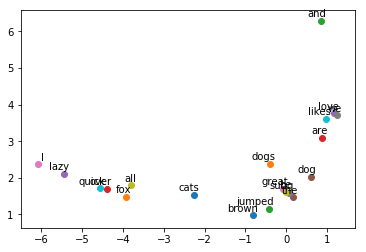

In [71]:
# Show word2vec if dim is 2
if trained_embeddings.shape[1] == 2:
    labels = rdic[:20] # Show top 20 words
    for i, label in enumerate(labels):
        x, y = trained_embeddings[i,:]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2),
            textcoords='offset points', ha='right', va='bottom')
    plt.show()